In [3]:
from keras.datasets import imdb 
from keras import preprocessing
from keras import utils

max_features = 1000
maxlen = 20

(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

x_train = utils.pad_sequences(x_train, maxlen=maxlen)
x_test = utils.pad_sequences(x_test, maxlen=maxlen)

In [2]:
from keras import preprocessing

In [5]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6768 - acc: 0.6011 - val_loss: 0.6399 - val_acc: 0.6732
Epoch 2/10
625/625 [==============================] - 1s 955us/step - loss: 0.5760 - acc: 0.7200 - val_loss: 0.5539 - val_acc: 0.7146
Epoch 3/10
625/625 [==============================

In [18]:
import os

imdb_dir = r'C:\Users\natsc\Desktop\machine_learning\deeplearningwithpython\imdb_data\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in  ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [19]:
from keras_preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [16]:
labels.shape

(0,)

In [34]:
glove_dir = r'C:\Users\natsc\Downloads'

embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embeddings_index))


Found 400000 word vectors


In [35]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for wordd, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            


In [61]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(max_words,embedding_dim,input_length=maxlen),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
    ])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                320032    
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [64]:
model.compile(optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 86ms/step - loss: 2.2895 - acc: 0.4650 - val_loss: 0.6939 - val_acc: 0.4946
Epoch 2/10
7/7 [==============================] - 0s 71ms/step - loss: 0.6944 - acc: 0.5450 - val_loss: 0.6934 - val_acc: 0.4961
Epoch 3/10
7/7 [==============================] - 0s 71ms/step - loss: 0.6939 - acc: 0.5350 - val_loss: 0.6994 - val_acc: 0.5002
Epoch 4/10
7/7 [==============================] - 0s 69ms/step - loss: 0.7030 - acc: 0.5400 - val_loss: 0.6931 - val_acc: 0.5002
Epoch 5/10
7/7 [==============================] - 0s 72ms/step - loss: 0.6901 - acc: 0.5400 - val_loss: 0.6934 - val_acc: 0.4955
Epoch 6/10
7/7 [==============================] - 0s 69ms/step - loss: 0.6986 - acc: 0.5400 - val_loss: 0.6932 - val_acc: 0.4965
Epoch 7/10
7/7 [==============================] - 0s 76ms/step - loss: 0.7087 - acc: 0.5400 - val_loss: 0.6932 - val_acc: 0.4998
Epoch 8/10
7/7 [==============================] - 0s 74ms/step - loss: 0.6977 - acc: 0.5400 - val

<Figure size 432x288 with 0 Axes>

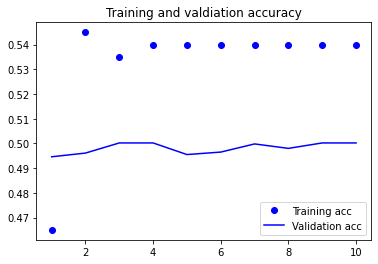

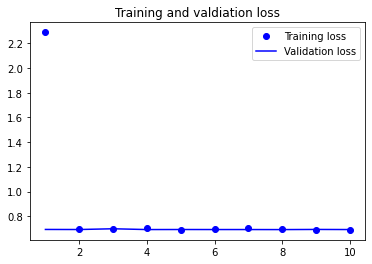

<Figure size 432x288 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and valdiation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and valdiation loss')
plt.legend()

plt.figure()

In [52]:
embedding_matrix.shape

(10000, 100)

#WTIHOUT PRETRAINED WORD EMBEDDINGS

In [57]:
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                320032    
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 80ms/step - loss: 0.6937 - acc: 0.4850 - val_loss: 0.6925 - val_acc: 0.5086
Epoch 2/10
7/7 [==============================] - 0s 66ms/step - loss: 0.5145 - acc: 0.9800 - val_loss: 0.6927 - val_acc: 0.5178
Epoch 3/10
7/7 [==============================] - 0s 63ms/step - loss: 0.2950 - acc: 0.9950 - val_loss: 0.6988 - val_acc: 0.5193
Epoch 4/10
7/7 [==============================] - 0s 65ms/step - loss: 0.1310 - acc: 0.9950 - val_loss: 0.7055 - val_acc: 0.5098
Epoch 5/10
7/7 [==============================] - 0s 67ms/step - loss: 0.0616 - acc: 1.0000 - val_loss: 0.7125 - val_acc: 0.5255
Epoch 6/10
7/7 [==============================] - 0s 67ms/step - loss: 0.0326 - acc: 1.0000 - val_loss: 0.7350 - val_acc: 0.5200
Epoch 7/10
7/7 [==============================] - 0s 65ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.7147 - val_acc: 0.5244
Epoch 8/10
7/7 [==============================] - 0s 65ms/step - loss: 0.0104 - acc: 1.0000 - val

<Figure size 432x288 with 0 Axes>

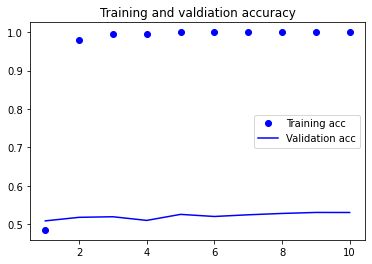

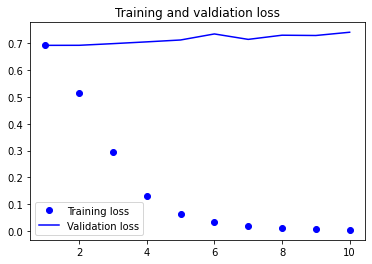

<Figure size 432x288 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and valdiation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and valdiation loss')
plt.legend()

plt.figure()

In [66]:
#TOKENIZING THE DATA OF THE TESt SET

In [84]:
test_dir = os.path.join(imdb_dir,'test')
labels=[]
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf-8')
            texts.append(f.read())
            f.close
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
    sequences = tokenizer.texts_to_sequences(texts)
    x_test = pad_sequences(sequences, maxlen=maxlen)
    y_test = np.asarray(labels)

In [85]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5000


[0.6931526064872742, 0.5]

In [82]:
x_test

array([], shape=(0, 100), dtype=int32)

In [83]:
y_test

array([], dtype=float64)

In [79]:
os.path.join(test_dir,label_type)

'C:\\Users\\natsc\\Desktop\\machine_learning\\deeplearningwithpython\\imdb_data\\aclImdb\\test\\pos'